# Card-Heining-Kline event study

In [1]:
# Add PyTwoWay to system path (do not run this)
# import sys
# sys.path.append('../../..')

## Import the PyTwoWay package

Make sure to install it using `pip install pytwoway`.

In [2]:
import pytwoway as tw
import bipartitepandas as bpd

## Get your data ready

For this notebook, we simulate data.

In [3]:
df = bpd.SimBipartite().simulate()
display(df)

,i,j,y,t,l,k,alpha,psi
0,0,81,0.283938,0,2,4,0.000000,-0.114185
1,0,81,-1.613504,1,2,4,0.000000,-0.114185
2,0,175,1.057488,2,2,8,0.000000,0.908458
3,0,45,0.894313,3,2,2,0.000000,-0.604585
4,0,90,1.122351,4,2,4,0.000000,-0.114185
...,...,...,...,...,...,...,...,...
49995,9999,2,-2.978308,0,0,0,-0.967422,-1.335178
49996,9999,2,-2.532244,1,0,0,-0.967422,-1.335178
49997,9999,14,-2.428863,2,0,0,-0.967422,-1.335178
49998,9999,14,-0.928106,3,0,0,-0.967422,-1.335178


## Prepare data

This is exactly how you should prepare real data prior to generating the CHK plot.

- First, we convert the data into a `BipartitePandas DataFrame`

- Second, we clean the data (e.g. drop NaN observations, make sure firm and worker ids are contiguous, etc.)

- Third, we cluster firms by the quartile of their mean income, to generate firm classes (columns `g1` and `g2`). Alternatively, manually set the columns `g1` and `g2` to pre-estimated clusters (but make sure to [add them correctly!](https://tlamadon.github.io/bipartitepandas/notebooks/custom_columns.html#Adding-custom-columns-to-an-instantiated-DataFrame)).

- Fourth, we convert the data into extended event study format

Further details on `BipartitePandas` can be found in the package documentation, available [here](https://tlamadon.github.io/bipartitepandas/).

<div class="alert alert-info">

Note

In general, the CHK event study is generated by clustering the data using quartiles of firm-level mean income.

</div>

In [4]:
measures = bpd.measures.Moments(measures='mean')
grouping = bpd.grouping.Quantiles(n_quantiles=4)
cluster_params = bpd.cluster_params(
    {
        'measures': measures,
        'grouping': grouping
    }
)

bdf = bpd.BipartiteDataFrame(
    i=df['i'], j=df['j'], y=df['y'], t=df['t']
) \
    .clean() \
    .cluster(cluster_params) \
    .to_extendedeventstudy(transition_col='j', periods_pre=2, periods_post=2)

checking required columns and datatypes
sorting rows
dropping NaN observations
generating 'm' column
keeping highest paying job for i-t (worker-year) duplicates (how='max')
dropping workers who leave a firm then return to it (how=False)
making 'i' ids contiguous
making 'j' ids contiguous
computing largest connected set (how=None)
sorting columns
resetting index


## Creating CHK event study plot

Once the data is cleaned, clustered, and in extended event study form, we can generate the event study plots.

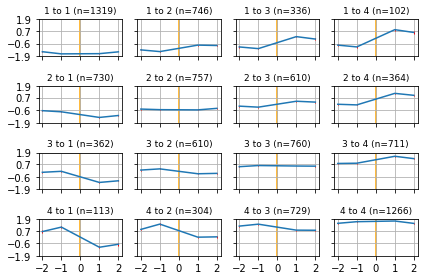

In [5]:
tw.diagnostics.plot_extendedeventstudy(bdf, periods_pre=2, periods_post=2)

<div class="alert alert-warning">

Warning

Be careful not to include too many clusters!

</div>

checking required columns and datatypes
sorting rows
dropping NaN observations
generating 'm' column
keeping highest paying job for i-t (worker-year) duplicates (how='max')
dropping workers who leave a firm then return to it (how=False)
making 'i' ids contiguous
making 'j' ids contiguous
computing largest connected set (how=None)
sorting columns
resetting index


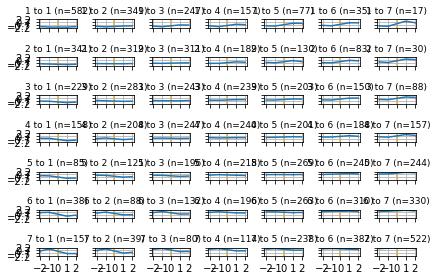

In [6]:
measures = bpd.measures.Moments(measures='mean')
grouping = bpd.grouping.Quantiles(n_quantiles=7)
cluster_params = bpd.cluster_params(
    {
        'measures': measures,
        'grouping': grouping
    }
)

bdf = bpd.BipartiteDataFrame(
    i=df['i'], j=df['j'], y=df['y'], t=df['t']
) \
    .clean() \
    .cluster(cluster_params) \
    .to_extendedeventstudy(transition_col='j', periods_pre=2, periods_post=2)

tw.diagnostics.plot_extendedeventstudy(bdf, periods_pre=2, periods_post=2)